In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [4]:
os.chdir('C:\\Users\\nikit\\Desktop\\ALABS\\PYTHON CASE STUDIES\\CASE studies\\Case Study 1 - Retail Case Study')

In [6]:
Customer = pd.read_csv('Customer.csv')
Product = pd.read_csv('prod_cat_info.csv')
Transaction = pd.read_csv('Transactions.csv')

## 1) MERGING DATASETS :

In [8]:
Trans_Cust= pd.merge(left = Transaction, right = Customer, how= 'left', left_on = 'cust_id' , right_on ='customer_Id' )

In [10]:
Customer_Final = pd.merge(left = Trans_Cust  , right = Product, left_on =['prod_cat_code','prod_subcat_code'], right_on = ['prod_cat_code','prod_sub_cat_code'])

In [12]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


In [14]:
## dropping dulpicate columns:
Customer_Final.drop(labels =['customer_Id','prod_sub_cat_code'],axis =1,inplace = True )

## 2) EDA

In [16]:
Customer_Final.shape

(23053, 15)

In [156]:
print ("In the current dataset we have a total of", Customer_Final.shape[0], "rows and", Customer_Final.shape[1] ,"columns.")

In the current dataset we have a total of 23053 rows and 15 columns.


### a) The column names and their corresponding data types :


In [158]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  DOB               23053 non-null  object 
 11  Gender            23044 non-null  object 
 12  city_code         23045 non-null  float64
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


In [ ]:
#Observations:

#In the current data set we have 23053 entires , however  in Gender and city code column there seems to some null values .
#The DOB has object dtype instead of datetime.
#The Transaction date is having object dtype instead of datetime.

### b)Top/Bottom 10 observations

In [ ]:
Customer_Final.head(10)

## CHANGING DATATYPES

In [18]:
Customer_Final.DOB= pd.to_datetime(Customer_Final.DOB, format = '%d-%m-%Y'  )  

In [20]:
 Customer_Final.tran_date=Customer_Final.tran_date.str.replace('/','-' )

In [22]:
Customer_Final.tran_date= pd.to_datetime(Customer_Final.tran_date, format = '%d-%m-%Y'  )  

In [24]:
Customer_Final[['tran_date','DOB']]

,tran_date,DOB
0,2014-02-28,1981-09-26
1,2014-02-27,1973-05-11
2,2014-02-24,1992-07-27
3,2014-02-24,1981-06-08
4,2014-02-23,1992-07-27
...,...,...
23048,2011-01-25,1972-02-21
23049,2011-01-25,1984-04-27
23050,2011-01-25,1976-06-20
23051,2011-01-25,1970-05-22


In [ ]:
# The data type of DOB and transaction date was changed to datetime.

In [26]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  datetime64[ns]
 11  Gender            23044 non-null  object        
 12  city_code         23045 non-null  float64       
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

### c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [ ]:
 Customer_Final.describe().T

### d) Frequency tables for all the categorical variables

In [ ]:
 Customer_Final.describe(include = "object").T

In [ ]:
# Quantity , rate and total amounts have negative values which needs to investigated.

# 3) Generate histograms for all continuous variables and frequency bars for categorical variables.

In [28]:
Customer_Final_cat= Customer_Final.select_dtypes(include='object')
Customer_Final_cont= Customer_Final.select_dtypes(include= ['int64','float'])

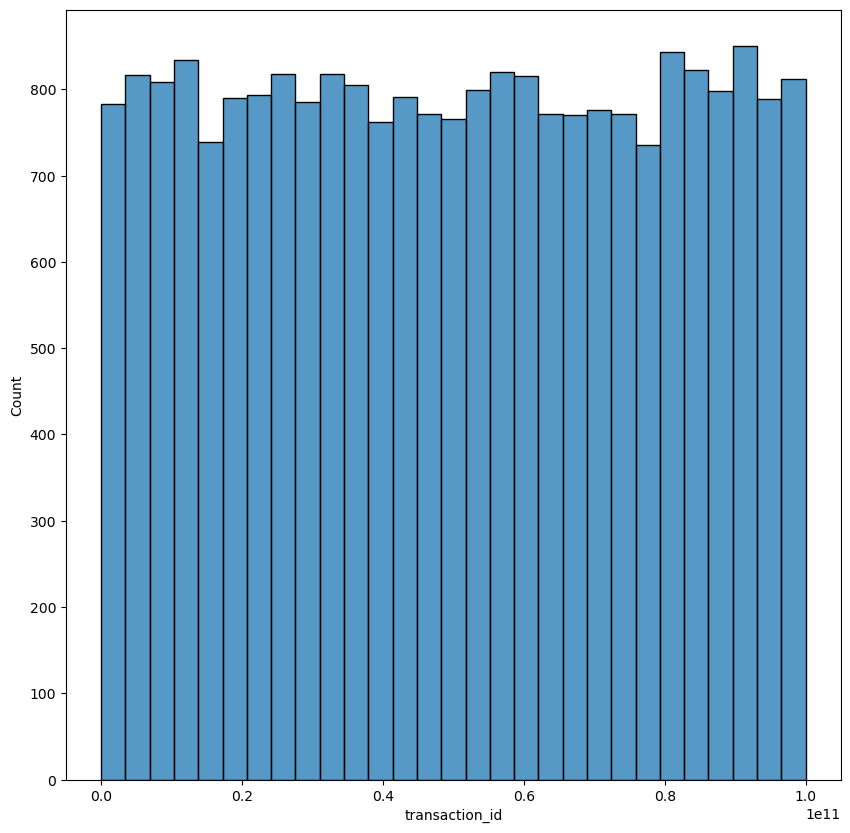

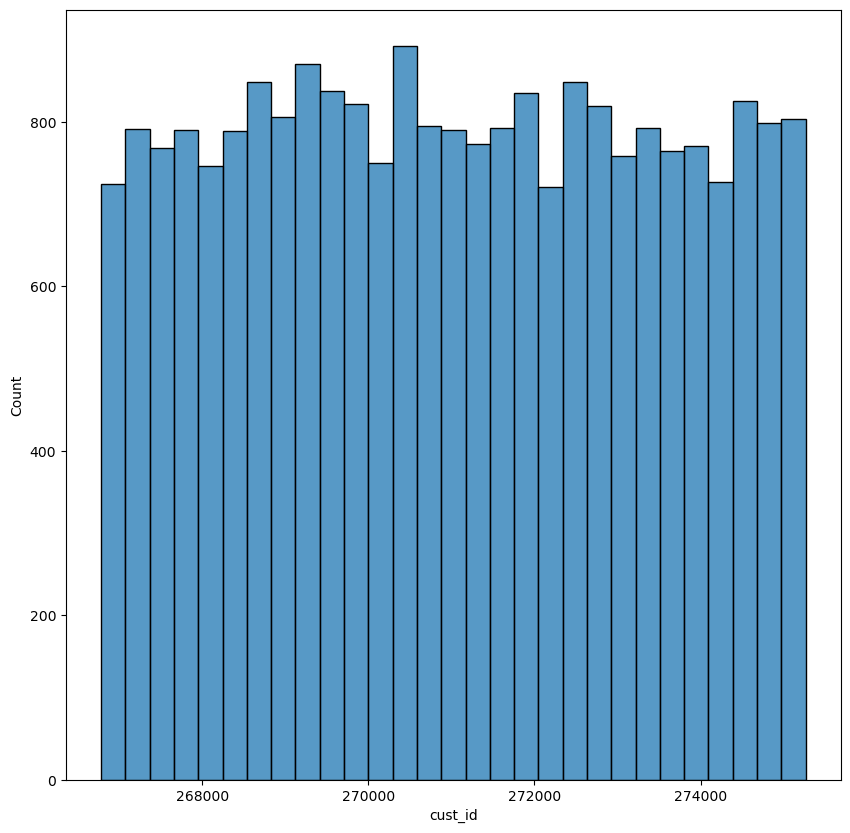

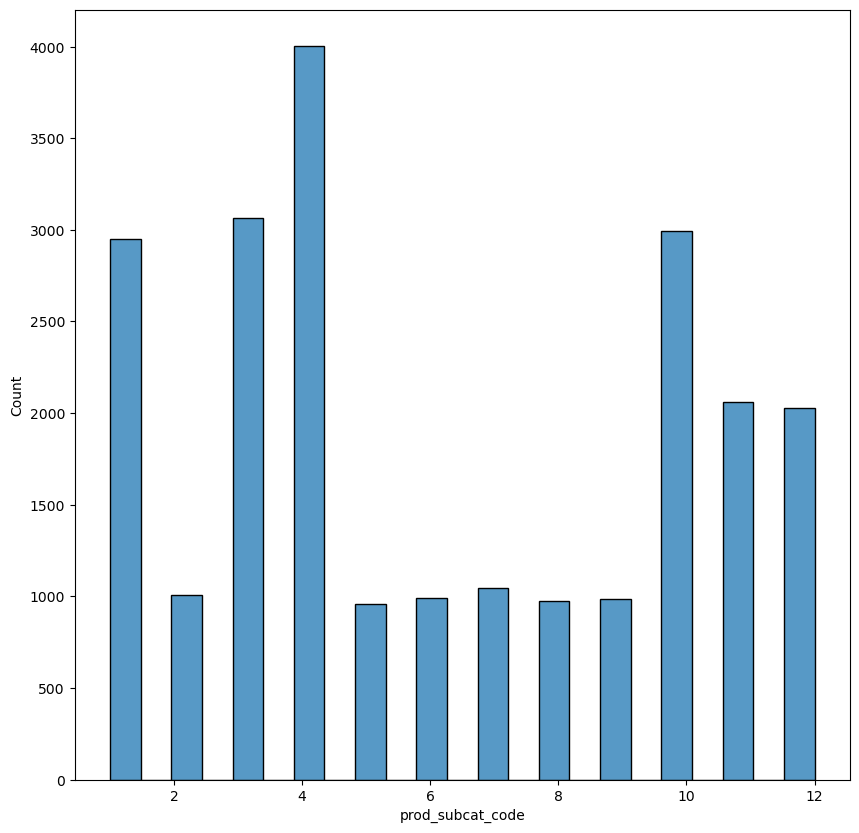

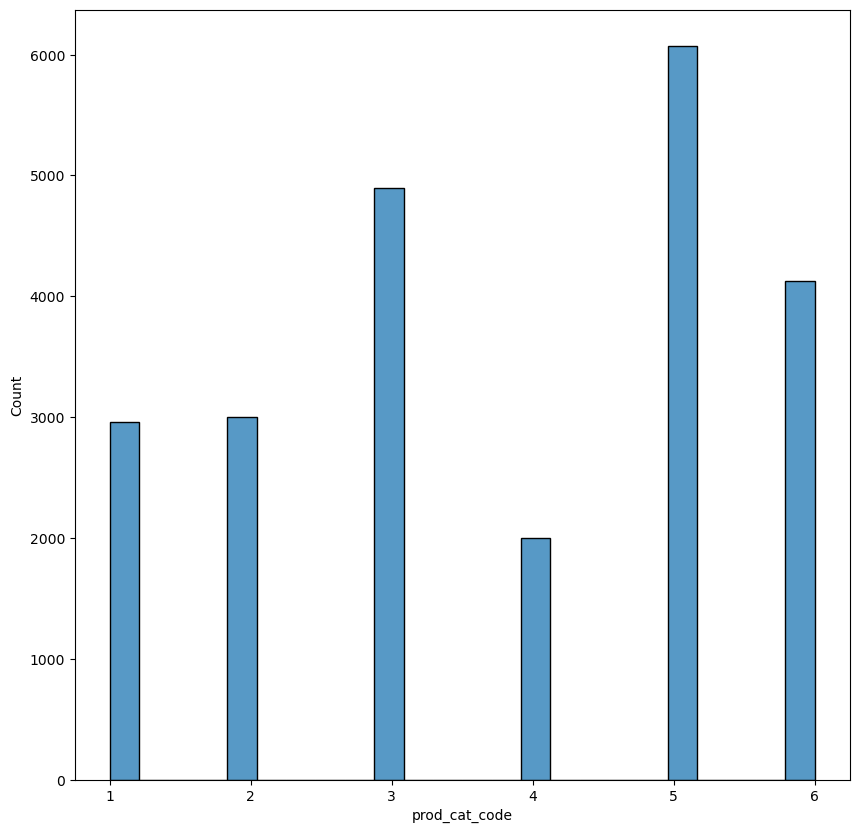

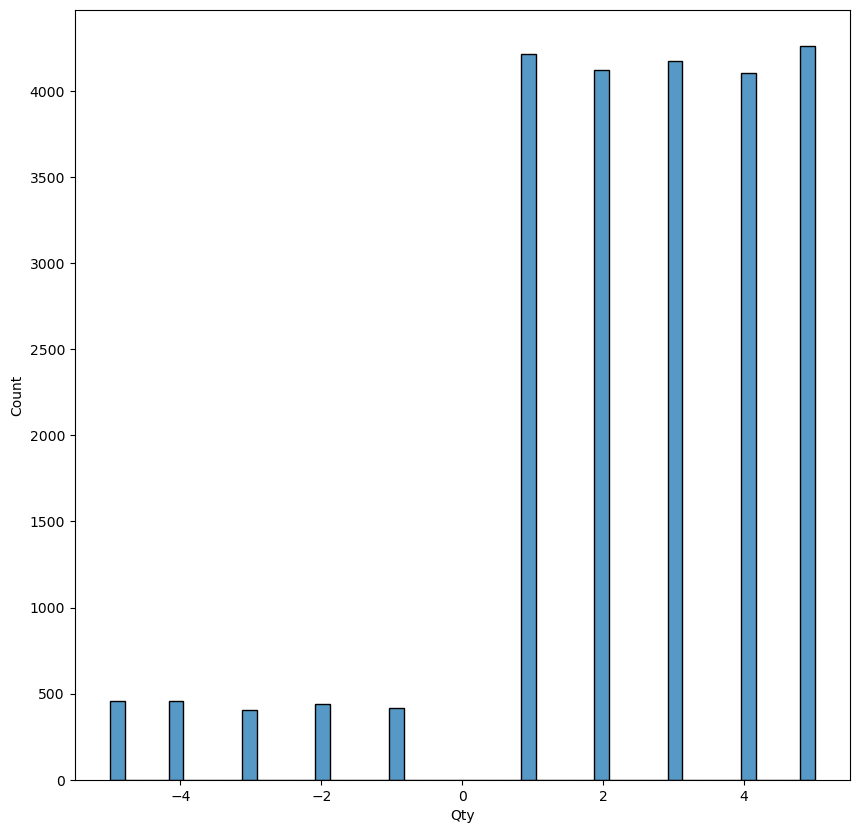

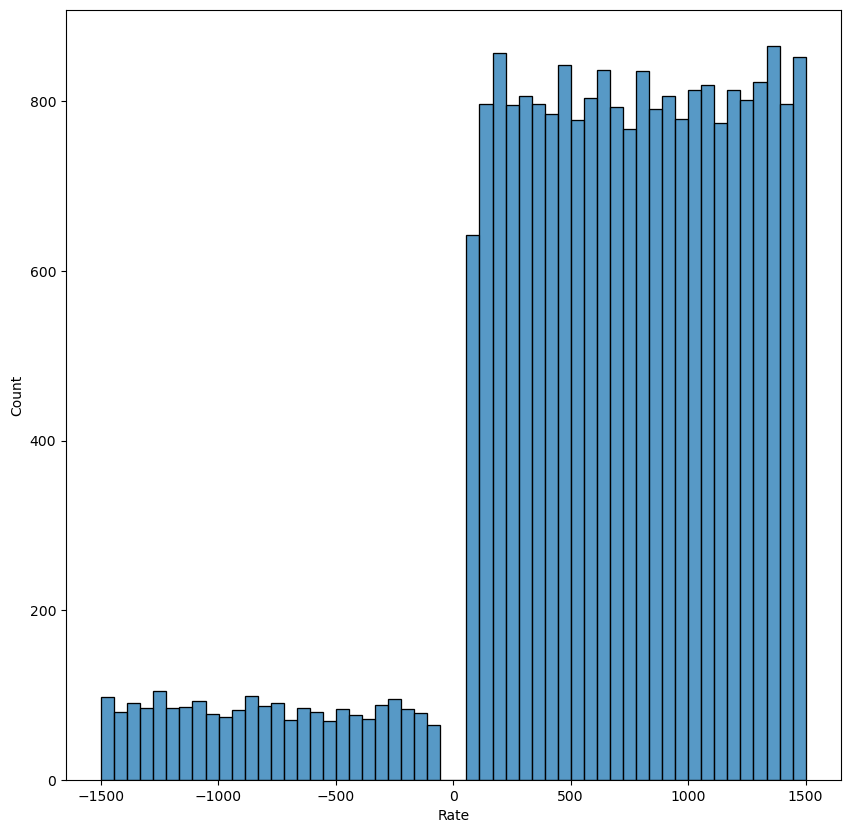

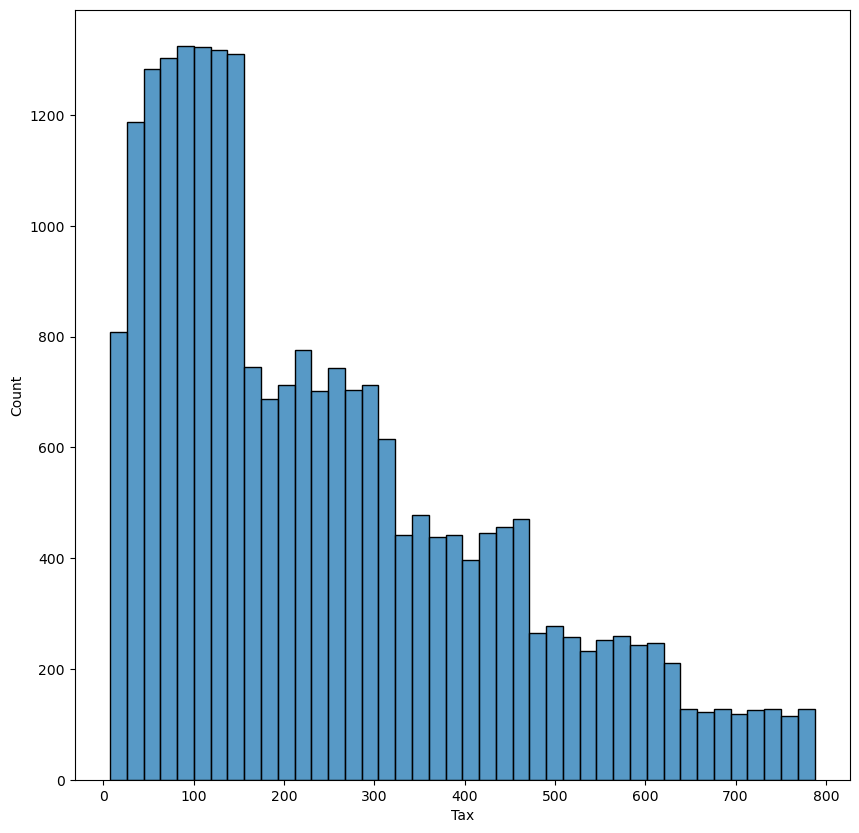

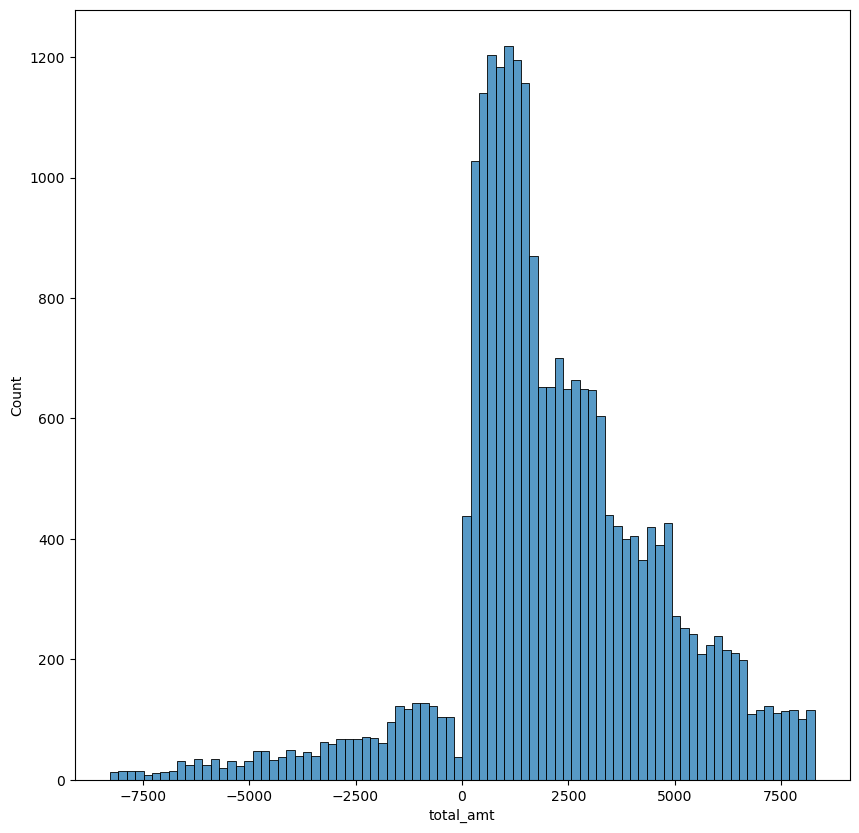

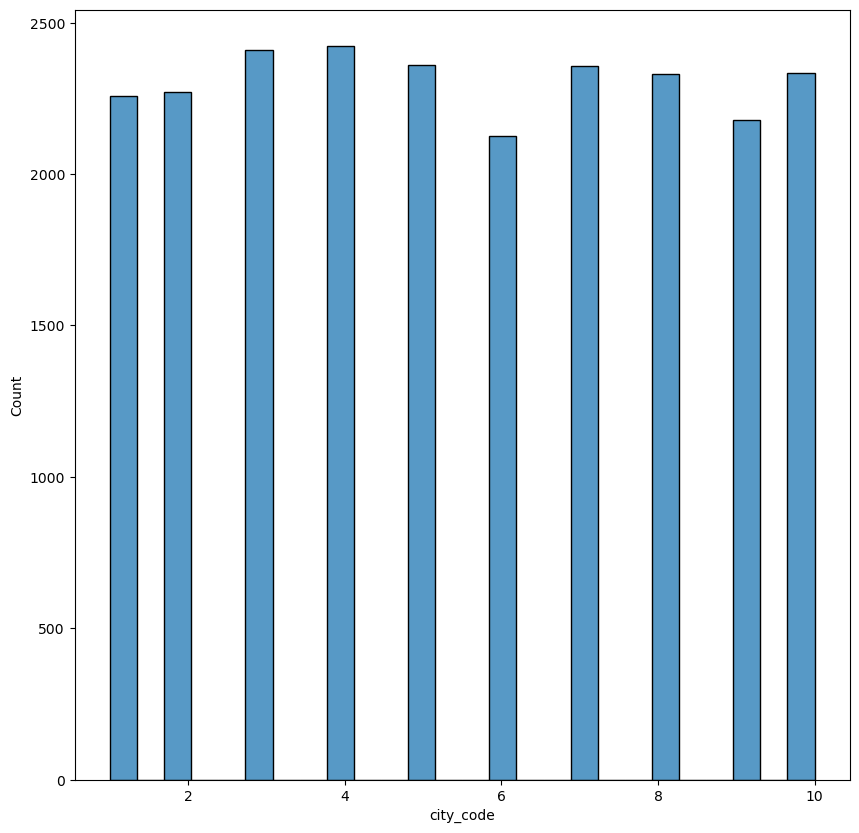

In [30]:
for i in Customer_Final_cont:
    plt.figure(figsize= (10,10))
    sns.histplot(data = Customer_Final_cont , x = Customer_Final_cont[i] )
    plt.show()

# -- Checking inconsistencies in the data:

In [106]:
Customer_Final.value_counts()

transaction_id  cust_id  tran_date   prod_subcat_code  prod_cat_code  Qty  Rate   Tax      total_amt  Store_type      DOB         Gender  city_code  prod_cat          prod_subcat
44125492691     274748   2011-12-19  3                 2              -5   -767   402.675  -4237.675  e-Shop          1991-06-22  M       1.0        Footwear          Women          2
84298959416     268663   2012-04-22  3                 5              -2   -321   67.410   -709.410   TeleShop        1975-05-17  F       8.0        Books             Comics         2
98271941861     267939   2011-06-29  10                5              -4   -1238  519.960  -5471.960  Flagship store  1985-03-18  F       1.0        Books             Non-Fiction    2
48727689115     270330   2012-10-21  4                 3              -4   -1158  486.360  -5118.360  TeleShop        1981-07-13  M       3.0        Electronics       Mobiles        2
42255136382     270202   2012-08-25  12                5              -4   -841   353

In [32]:
 
for i in Customer_Final_cat:
    print(i.upper())
    print(end='\n')
    print(Customer_Final_cat[i].value_counts())
    print(end='\n')

STORE_TYPE

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64

GENDER

Gender
M    11811
F    11233
Name: count, dtype: int64

PROD_CAT

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64

PROD_SUBCAT

prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64



In [ ]:
## In the categorical segment of the data set no inconsistencies were  observed .

# -- Check outliers 

<Axes: xlabel='Rate'>

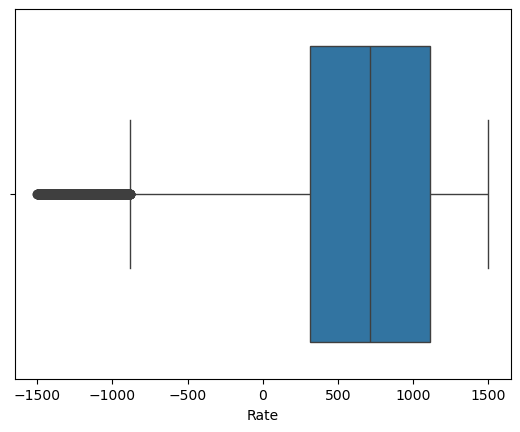

In [34]:
sns.boxplot(data = Customer_Final, x= 'Rate' )

<Axes: xlabel='Qty'>

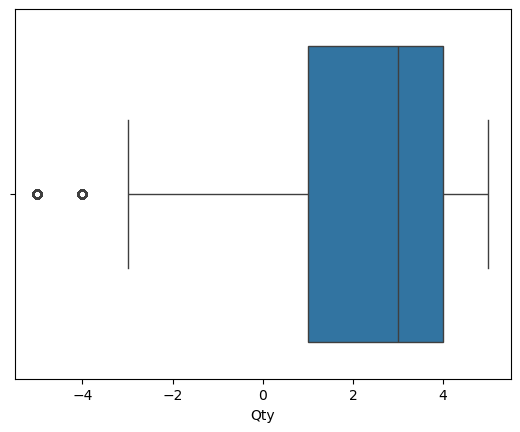

In [36]:
sns.boxplot(data = Customer_Final, x= 'Qty' )

# -- Check missing values :

In [38]:
Customer_Final[(Customer_Final.Gender.isnull()) | (Customer_Final.city_code.isnull())]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
1776,85496594077,267199,2013-11-27,1,1,-4,-366,153.720,-1617.720,e-Shop,1970-02-14,NaN,2.0,Clothing,Women
1833,85496594077,267199,2013-11-24,1,1,4,366,153.720,1617.720,e-Shop,1970-02-14,NaN,2.0,Clothing,Women
3711,81458995048,268447,2013-08-26,10,5,1,850,89.250,939.250,e-Shop,1970-07-14,M,NaN,Books,Non-Fiction
3852,38169306418,268709,2013-08-18,5,3,1,485,50.925,535.925,TeleShop,1970-09-09,F,NaN,Electronics,Computers
3907,5723163001,267199,2013-08-15,6,5,1,244,25.620,269.620,e-Shop,1970-02-14,NaN,2.0,Books,DIY
6049,50093131361,268447,2013-05-03,9,3,5,879,461.475,4856.475,TeleShop,1970-07-14,M,NaN,Electronics,Cameras
6916,55955314599,271626,2013-03-20,11,6,5,1039,545.475,5740.475,TeleShop,1970-06-02,NaN,6.0,Home and kitchen,Bath
8534,86339422638,268447,2012-12-31,1,4,1,238,24.990,262.990,Flagship store,1970-07-14,M,NaN,Bags,Mens
8761,51951874983,271626,2012-12-20,10,5,4,845,354.900,3734.900,TeleShop,1970-06-02,NaN,6.0,Books,Non-Fiction
12376,78371516927,271626,2012-06-29,11,5,3,1022,321.930,3387.930,TeleShop,1970-06-02,NaN,6.0,Books,Children


In [198]:
Customer_Final


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


In [40]:
Customer_Final.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64

In [ ]:
# Gender column missing values : 9
# City code missing values : 8 


In [42]:
Customer_Final.isna().sum()/len(Customer_Final)

transaction_id      0.000000
cust_id             0.000000
tran_date           0.000000
prod_subcat_code    0.000000
prod_cat_code       0.000000
Qty                 0.000000
Rate                0.000000
Tax                 0.000000
total_amt           0.000000
Store_type          0.000000
DOB                 0.000000
Gender              0.000390
city_code           0.000347
prod_cat            0.000000
prod_subcat         0.000000
dtype: float64

In [ ]:
## Since the missing values in gender and city code is less than 5%  as per industry standards we have decided to drop them. 

In [44]:
Customer_Final.dropna(subset = ['Gender','city_code'], inplace= True)

In [46]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


## -- Checking duplicates 

In [48]:
Customer_Final.duplicated().sum()

13

In [ ]:
## It has been found that there are 13 duplicate rows in data set so we have decide to drop them.

In [50]:
Customer_Final.drop_duplicates(inplace = True )

In [52]:
Customer_Final.duplicated().sum()

0

In [ ]:
## The duplicates have been dropped.

# Univariate analysis

In [ ]:
Customer_Final_num= Customer_Final.select_dtypes('number')

In [ ]:
Customer_Final_obj= Customer_Final.select_dtypes('object')

In [ ]:
for i in Customer_Final_num :
    Customer_Final[i].plot(kind='box')
    plt.show()
    

In [ ]:
## It was found that : Qty(-), Rate(-), Tax(+),Total amount (+/-) had outliers.

In [ ]:
BIVARIATE ANALYSIS

In [ ]:
plt.figure(figsize =(10,12))
sns.heatmap(data= Customer_Final_cont.corr(), annot= True,vmin=-1, vmax=1, cmap= 'Blues')

## treating outliers IN THE FOLLOWING COLUMNS (Qty(-), Rate(-), Tax(+),Total amount (+/-))

In [55]:
for i in Customer_Final:
    if Customer_Final[i].dtypes in ('int64','float','int'):
        Q1= Customer_Final[i].quantile(0.25)
        Q3 = Customer_Final[i].quantile(0.75)
        IQR =Q3-Q1
        lowerl= Q1 -(1.5*IQR)
        upperl= Q3 +(1.5*IQR)
        Customer_Final[i]= Customer_Final[i].clip (lower=lowerl,upper =upperl)
        

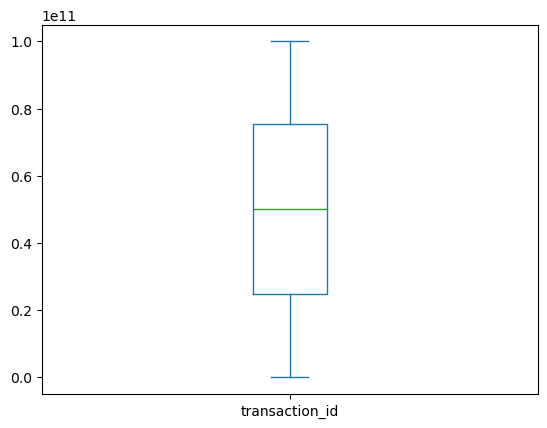

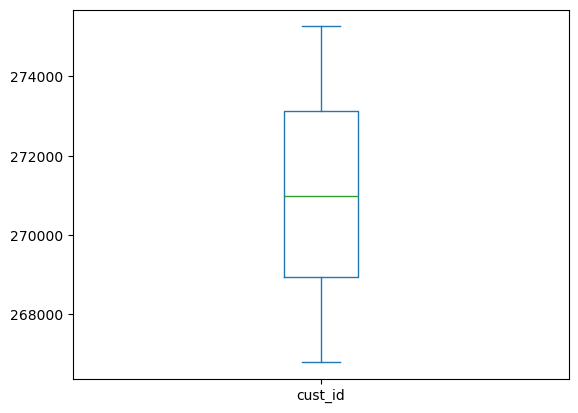

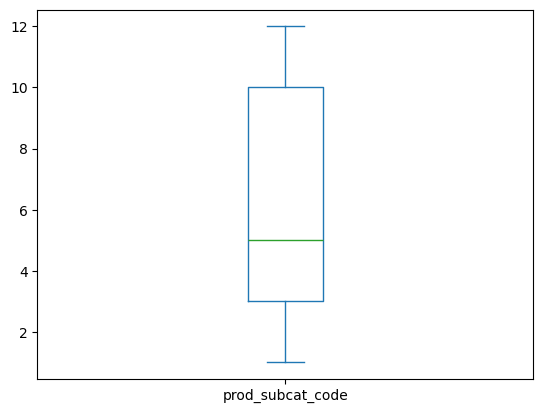

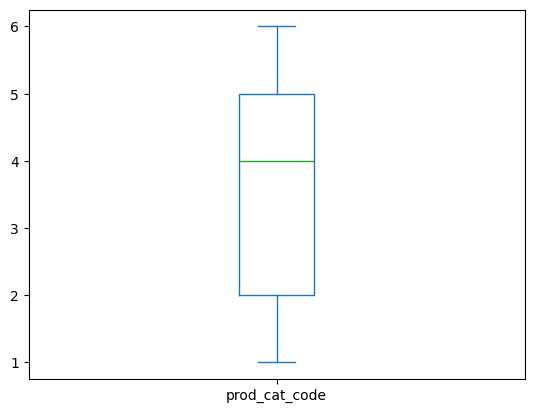

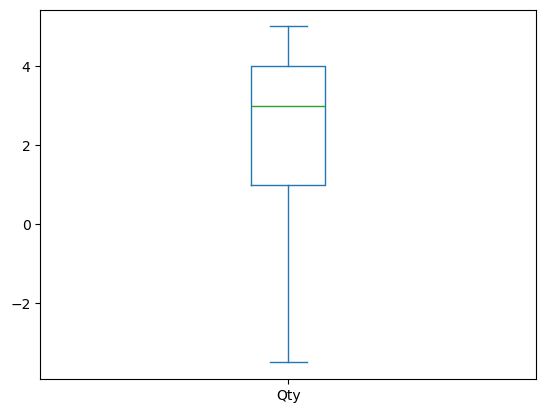

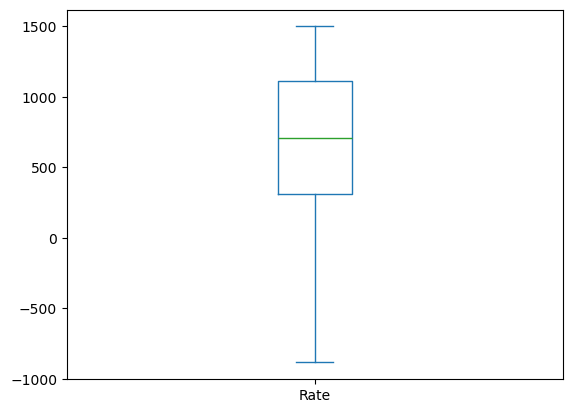

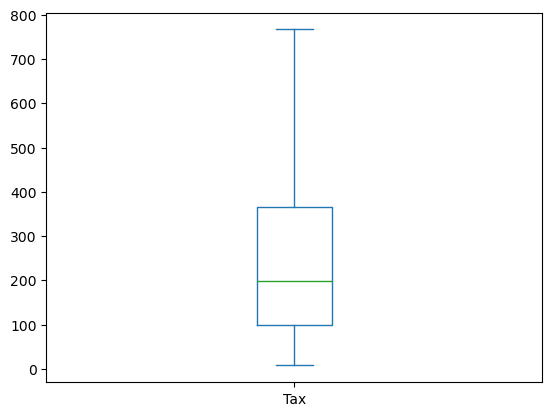

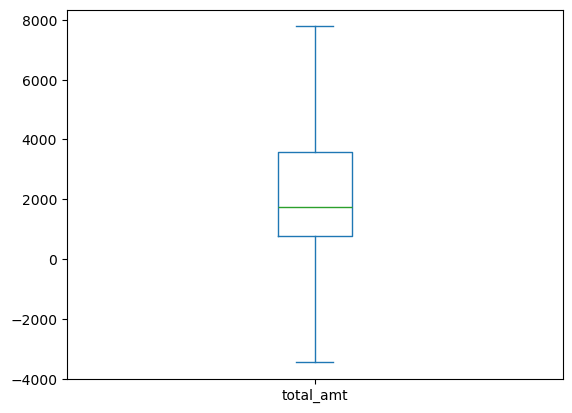

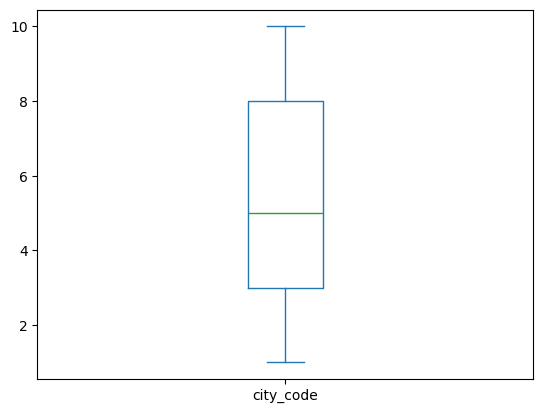

In [57]:
for i in Customer_Final:
    if Customer_Final[i].dtypes in ('int64','float','int'):
        Customer_Final[i].plot(kind='box')
        plt.show()

In [ ]:
## The outliers have been treated in all the listed columns 


# 4) 

#### a) Time period of available transaction data 

In [ ]:
Max_d= Customer_Final.tran_date.max()
Min_d= Customer_Final.tran_date.min()

In [ ]:
 Max_d-Min_d

 #### b. Count of transactions where the total amount of transaction was negative

In [ ]:
Customer_Final[Customer_Final.total_amt <0].transaction_id.count()

# 5. Analyze which product categories are more popular among females vs male customers.


In [ ]:
Customer_Final[['Gender','prod_cat', ]].groupby(by = ['Gender','prod_cat'] ).agg({'prod_cat':'count'}) 

In [ ]:
# Among females the category most bought is Electronics and in case of males is Books 

# 6. Which City code has the maximum customers and what was the percentage of customers from that city

In [ ]:
Max_cust = Customer_Final[['city_code','cust_id']].groupby(by='city_code').agg({'cust_id': 'count'}).reset_index()


In [ ]:
Max_cust['Percentage'] = (Max_cust.cust_id/Max_cust.cust_id.sum())*100

In [ ]:
Max_cust.sort_values(by='Percentage', ascending = False)

In [ ]:
# The city code 4.0 has the max numbers of customers of about 2422 , which forms 10.519% of the entire customer base .

# 7. Which store type sells the maximum products by value and by quantity

In [ ]:
Customer_Final.head(2)

In [ ]:
Customer_Final[['Store_type','total_amt','Qty']].groupby(by='Store_type').sum().sort_values(by=['total_amt','Qty'], ascending =False)


In [ ]:
## The store_type : e-shop sells the maximum products by value and by quantity

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from  Flagship Stores?


In [218]:
Customer_Final[(Customer_Final.Store_type == 'Flagship store') & ((Customer_Final.prod_cat == 'Electronics') | (Customer_Final.prod_cat == 'Clothing'))].iloc[:,8].sum()

3512549.1375

In [128]:
Customer_Final[['Store_type','prod_cat','total_amt']].groupby (by =['Store_type','prod_cat']).sum().reset_index().iloc[2:4,2].sum()

3512565.16

In [216]:
print('The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is',Customer_Final[['Store_type','prod_cat','total_amt']].groupby (by =['Store_type','prod_cat']).sum().reset_index().iloc[2:4,2].sum())

The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is 3512549.1375


# 9. What was the total amount earned from "Male" customers under the "Electronics" category

In [ ]:
Customer_Final.pivot_table(index=['Gender','prod_cat'], values= 'total_amt',aggfunc='sum').loc['M'].loc['Electronics'].sum()

In [220]:
print('The total amount earned from "Male" customers under the "Electronics" category is',Customer_Final.pivot_table(index=['Gender','prod_cat'], values= 'total_amt',aggfunc='sum').loc['M'].loc['Electronics'].sum())

The total amount earned from "Male" customers under the "Electronics" category is 5826561.6825


# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [ ]:
Customer_Final[(Customer_Final.Qty >0) &(Customer_Final.Rate>0)	&(Customer_Final.Tax>0)	&(Customer_Final.total_amt>0)].pivot_table(index='transaction_id',  aggfunc='size').sum()

In [ ]:
#Hence a particular transaction id was not repeated in any row .

In [132]:
Cust= Customer_Final[(Customer_Final.Qty >0) &(Customer_Final.Rate>0)	&(Customer_Final.Tax>0)	&(Customer_Final.total_amt>0)].pivot_table(index='cust_id',values ='transaction_id',aggfunc='count').rename(columns={'transaction_id':'transaction_count'})

In [134]:
len(Cust[Cust.transaction_count>10])

6

In [136]:
print('The number of customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is',len(Cust[Cust.transaction_count>10]))

The number of customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is 6


# 11.. For all customers aged between 25 - 35, find out:


In [59]:
Customer_Final['Age']= pd.Timestamp.today().year - Customer_Final.DOB.dt.year

In [61]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,Age
0,80712190438,270351,2014-02-28,1,1,-3.5,-772,405.300,-3449.2575,e-Shop,1981-09-26,M,5.0,Clothing,Women,43
1,29258453508,270384,2014-02-27,5,3,-3.5,-885,767.130,-3449.2575,e-Shop,1973-05-11,F,8.0,Electronics,Computers,51
2,51750724947,273420,2014-02-24,6,5,-2.0,-791,166.110,-1748.1100,TeleShop,1992-07-27,M,8.0,Books,DIY,32
3,93274880719,271509,2014-02-24,11,6,-3.0,-885,429.345,-3449.2575,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath,43
4,51750724947,273420,2014-02-23,6,5,-2.0,-791,166.110,-1748.1100,TeleShop,1992-07-27,M,8.0,Books,DIY,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1.0,1264,132.720,1396.7200,e-Shop,1972-02-21,M,7.0,Books,Academic,52
23049,89780862956,270022,2011-01-25,4,1,1.0,677,71.085,748.0850,e-Shop,1984-04-27,M,9.0,Clothing,Mens,40
23050,85115299378,271020,2011-01-25,2,6,4.0,1052,441.840,4649.8400,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing,48
23051,72870271171,270911,2011-01-25,11,5,3.0,1142,359.730,3785.7300,TeleShop,1970-05-22,M,2.0,Books,Children,54


In [63]:
Cust_limit = Customer_Final[(Customer_Final.Age >=25 ) & (Customer_Final.Age <=35 )]

## a. What was the total amount spent for “Electronics” and “Books” product categories 

In [65]:
Cust_limit[['prod_cat','total_amt']].groupby(by='prod_cat').sum().loc[['Electronics','Books'],'total_amt'].sum()

4042036.96

In [232]:
print ('The total amount spent for “Electronics” and “Books” product categories is',Cust_limit[['prod_cat','total_amt']].groupby(by='prod_cat').sum().loc[['Electronics','Books'],'total_amt'].sum())

The total amount spent for “Electronics” and “Books” product categories is 4042036.96


## b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

In [234]:
Cust_limit[(Cust_limit.tran_date >= pd.Timestamp(year= 2014,month=1, day= 1 )) & (Cust_limit.tran_date <= pd.Timestamp(year= 2014,month=3, day= 1 ))].loc[:,'total_amt'].sum()

442201.11

In [67]:
print('The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is :',Cust_limit[(Cust_limit.tran_date >= pd.Timestamp(year= 2014,month=1, day= 1 )) & (Cust_limit.tran_date <= pd.Timestamp(year= 2014,month=3, day= 1 ))].loc[:,'total_amt'].sum())

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is : 442201.11
